<a href="https://colab.research.google.com/github/SrashtiChauhan/Fake-Social-Media-Detection/blob/main/fakesocialmediadetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls -lh /content/*.csv


-rw-r--r-- 1 root root 4.5K Nov 24 12:57 /content/test.csv
-rw-r--r-- 1 root root  21K Nov 24 12:57 /content/train.csv


In [ ]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# display settings
pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')


In [ ]:
# Step 2: Load data
train_df = pd.read_csv("/content/train.csv")
test_df  = pd.read_csv("/content/test.csv")

print("Train shape:", train_df.shape)
print("Test shape: ", test_df.shape)
print("\nTrain head:")
display(train_df.head())
print("\nTest head:")
display(test_df.head())


Train shape: (576, 12)
Test shape:  (120, 12)

Train head:


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0



Test head:


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [ ]:
# Step 3: Quick checks
print("=== TRAIN INFO ===")
display(train_df.info())
print("\nMissing values (train):")
display(train_df.isnull().sum())
print("\nTrain describe:")
display(train_df.describe(include='all'))

print("\n=== TEST INFO ===")
display(test_df.info())
print("\nMissing values (test):")
display(test_df.isnull().sum())
print("\nTest describe:")
display(test_df.describe(include='all'))


=== TRAIN INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


None


Missing values (train):


,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0



Train describe:


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000



=== TEST INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


None


Missing values (test):


,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0



Test describe:


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [ ]:
# Step 4: Clean column names (optional but recommended)
def clean_cols(df):
    df = df.copy()
    df.columns = [c.strip().lower().replace(' ', '_').replace('/','_').replace('-','_') for c in df.columns]
    return df

train_df = clean_cols(train_df)
test_df  = clean_cols(test_df)

print("Columns now:")
print(train_df.columns.tolist())


Columns now:
['profile_pic', 'nums_length_username', 'fullname_words', 'nums_length_fullname', 'name==username', 'description_length', 'external_url', 'private', '#posts', '#followers', '#follows', 'fake']


In [ ]:
# Step 5: Ensure 'fake' exists and is numeric (0/1)
print("train columns:", train_df.columns.tolist())
if 'fake' not in train_df.columns or 'fake' not in test_df.columns:
    raise RuntimeError("Column 'fake' missing in train or test. Check column names (run Step 4).")

# convert to numeric if needed
train_df['fake'] = pd.to_numeric(train_df['fake'], errors='coerce')
test_df['fake']  = pd.to_numeric(test_df['fake'], errors='coerce')

print("unique values in train['fake']:", train_df['fake'].unique())
print("unique values in test['fake']:", test_df['fake'].unique())


train columns: ['profile_pic', 'nums_length_username', 'fullname_words', 'nums_length_fullname', 'name==username', 'description_length', 'external_url', 'private', '#posts', '#followers', '#follows', 'fake']
unique values in train['fake']: [0 1]
unique values in test['fake']: [0 1]


Train class counts:


,count
fake,
0,288
1,288


Test class counts:


,count
fake,
0,60
1,60


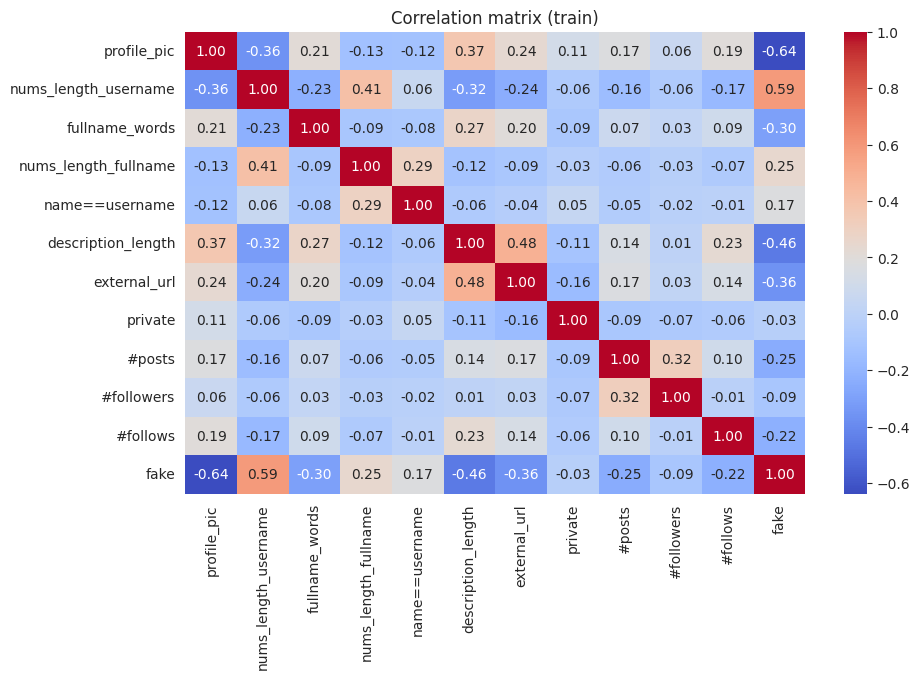

In [ ]:
# Step 6a: Class balance
print("Train class counts:")
display(train_df['fake'].value_counts())

print("Test class counts:")
display(test_df['fake'].value_counts())

# Step 6b: Correlation matrix (numeric columns only)
plt.figure(figsize=(10,6))
corr = train_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix (train)")
plt.show()


In [ ]:
# Step 7: Prepare features and target
# drop the target from X; use the same columns for train and test
feature_cols = [c for c in train_df.columns if c != 'fake']
X_train = train_df[feature_cols].copy()
y_train = train_df['fake'].copy()
X_test  = test_df[feature_cols].copy()
y_test  = test_df['fake'].copy()

print("Using features:", feature_cols)
print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)


Using features: ['profile_pic', 'nums_length_username', 'fullname_words', 'nums_length_fullname', 'name==username', 'description_length', 'external_url', 'private', '#posts', '#followers', '#follows']
X_train shape: (576, 11) X_test shape: (120, 11)


In [ ]:
# ===== Safe preprocessing: fill missing values and scale =====
import numpy as np
from sklearn.preprocessing import StandardScaler

# Work on copies to avoid chained-assignment issues
X_train = X_train.copy()
X_test  = X_test.copy()

# 1) Fill numeric NaNs with median (assign back explicitly)
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    med = X_train[col].median()
    X_train[col] = X_train[col].fillna(med)
    # use the same median computed on train to avoid data leakage
    X_test[col]  = X_test[col].fillna(med)

# 2) Convert boolean-like or yes/no columns to numeric if present
# Example checks and conversions (adjust column names if yours differ)
bool_like = []
for col in X_train.columns:
    # detect columns with only {0,1,True,False,'0','1','True','False'} kinds of values
    unique_vals = set(X_train[col].dropna().unique())
    if unique_vals.issubset({0,1,True,False,'0','1','True','False'}):
        bool_like.append(col)

# Convert them explicitly to integers
for col in bool_like:
    X_train[col] = X_train[col].replace({'True':1,'False':0,'0':0,'1':1}).astype(int)
    X_test[col]  = X_test[col].replace({'True':1,'False':0,'0':0,'1':1}).astype(int)

print("Numeric columns filled:", num_cols)
print("Bool-like columns converted:", bool_like)

# 3) If any non-numeric columns remain, raise a helpful message
non_numeric = [c for c in X_train.columns if not np.issubdtype(X_train[c].dtype, np.number)]
if non_numeric:
    print("Warning — these feature columns are non-numeric and need handling:", non_numeric)
else:
    print("All feature columns are numeric. Proceeding to scaling.")

# 4) Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Scaling done. Shapes:", X_train_scaled.shape, X_test_scaled.shape)


Numeric columns filled: ['profile_pic', 'nums_length_username', 'fullname_words', 'nums_length_fullname', 'name==username', 'description_length', 'external_url', 'private', '#posts', '#followers', '#follows']
Bool-like columns converted: ['profile_pic', 'name==username', 'external_url', 'private']
All feature columns are numeric. Proceeding to scaling.
Scaling done. Shapes: (576, 11) (120, 11)



Logistic Regression: Acc=0.8750, Prec=0.8814, Rec=0.8667, F1=0.8739


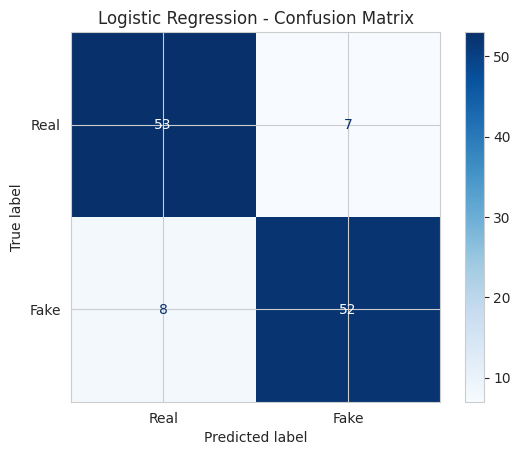


KNN: Acc=0.8833, Prec=0.8833, Rec=0.8833, F1=0.8833


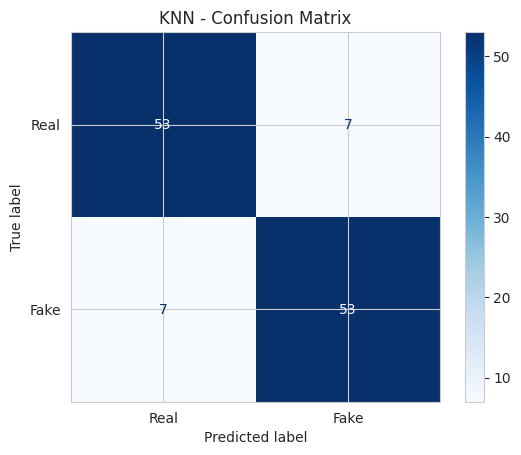


Decision Tree: Acc=0.8917, Prec=0.9123, Rec=0.8667, F1=0.8889


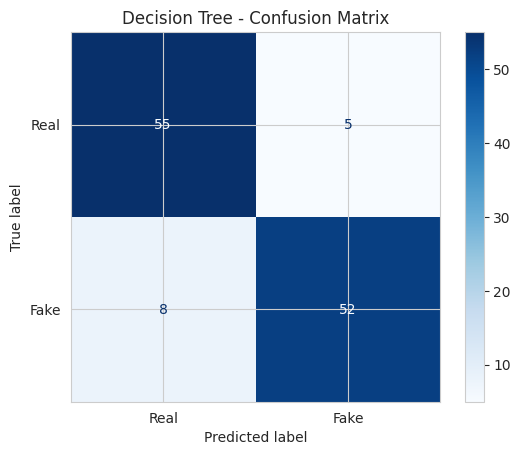


Random Forest: Acc=0.9167, Prec=0.9310, Rec=0.9000, F1=0.9153


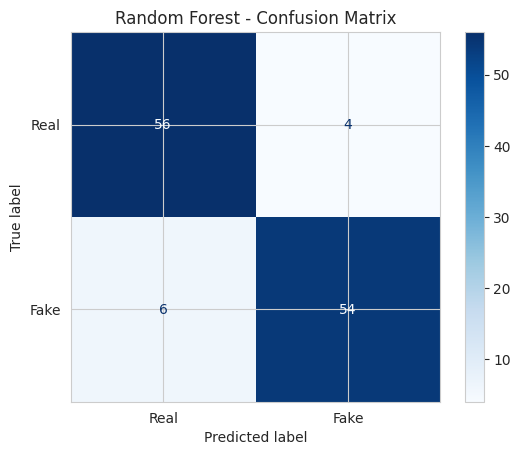

,Model,Accuracy,Precision,Recall,F1
3,Random Forest,0.916667,0.931034,0.900000,0.915254
2,Decision Tree,0.891667,0.912281,0.866667,0.888889
1,KNN,0.883333,0.883333,0.883333,0.883333
0,Logistic Regression,0.875000,0.881356,0.866667,0.873950


In [ ]:
# ===== Train & evaluate models =====
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    results.append((name, acc, prec, rec, f1))
    print(f"\n{name}: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real","Fake"])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1"])
display(results_df.sort_values("Accuracy", ascending=False))


In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Fit final Random Forest on full training set
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_scaled, y_train)

# Save the trained model and the scaler
joblib.dump(final_model, "fake_account_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model saved as 'fake_account_model.pkl'")
print("✅ Scaler saved as 'scaler.pkl'")


✅ Model saved as 'fake_account_model.pkl'
✅ Scaler saved as 'scaler.pkl'


In [ ]:
# Take the first sample from X_test
sample = X_test.iloc[[0]]  # keep as DataFrame
sample_scaled = scaler.transform(sample)

# Predict class (0=Real, 1=Fake)
pred_class = final_model.predict(sample_scaled)[0]
pred_prob  = final_model.predict_proba(sample_scaled)[0,1]  # probability of being fake

print("Example Prediction (0=Real, 1=Fake):", pred_class)
print(f"Probability of being fake: {pred_prob:.3f}")


Example Prediction (0=Real, 1=Fake): 0
Probability of being fake: 0.250


In [ ]:
import joblib

scaler = joblib.load("scaler.pkl")

# Check feature names stored in the scaler (if available)
if hasattr(scaler, 'feature_names_in_'):
    print("Scaler feature names:", scaler.feature_names_in_)
else:
    print("No feature names stored in scaler. Make sure you remember the training order.")


Scaler feature names: ['profile_pic' 'nums_length_username' 'fullname_words'
 'nums_length_fullname' 'name==username' 'description_length'
 'external_url' 'private' '#posts' '#followers' '#follows']


In [ ]:
model = joblib.load("fake_account_model.pkl")

# Check feature names if model supports it
if hasattr(model, 'feature_names_in_'):
    print("Model feature names:", model.feature_names_in_)


In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")  # or .xlsx
print(train_df.columns.tolist())


['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname', 'name==username', 'description length', 'external URL', 'private', '#posts', '#followers', '#follows', 'fake']


In [ ]:
!pip install streamlit pyngrok joblib --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.0 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import joblib

# ---------------- Load Model and Scaler ----------------
model = joblib.load("fake_account_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("Fake Instagram Account Detector")
st.write("Enter the account features below:")

# ---------------- User Inputs ----------------
profile_pic = st.slider("Has Profile Picture?", 0, 1, 0)
nums_length_username = st.number_input("Nums/length username", 0.0, 10.0, 0.0)
fullname_words = st.number_input("Fullname words", 0, 10, 0)
nums_length_fullname = st.number_input("Nums/length fullname", 0.0, 10.0, 0.0)
name_eq_username = st.slider("Is Name same as username?", 0, 1, 0)
description_length = st.number_input("Description length", 0, 500, 0)
external_url = st.slider("Has External URL?", 0, 1, 0)
private = st.slider("Is Private?", 0, 1, 0)
posts = st.number_input("Number of Posts", 0, 100000, 0)
followers = st.number_input("Number of Followers", 0, 1000000, 0)
follows = st.number_input("Number of Follows", 0, 1000000, 0)

# ---------------- Create Input DataFrame with exact feature names ----------------
input_data = pd.DataFrame([{
    "profile_pic": profile_pic,
    "nums_length_username": nums_length_username,
    "fullname_words": fullname_words,
    "nums_length_fullname": nums_length_fullname,
    "name==username": name_eq_username,
    "description_length": description_length,
    "external_url": external_url,
    "private": private,
    "#posts": posts,
    "#followers": followers,
    "#follows": follows
}])

# ---------------- Scale Input ----------------
input_scaled = scaler.transform(input_data)

# ---------------- Predict ----------------
prediction = model.predict(input_scaled)[0]

# ---------------- Show Result ----------------
st.subheader("Prediction Result:")
if prediction == 0:
    st.success("✅ This account is likely REAL")
else:
    st.error("❌ This account is likely FAKE")


2025-11-08 17:29:12.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 17:29:12.069 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 17:29:12.070 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 17:29:12.071 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 17:29:12.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 17:29:12.076 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 17:29:12.078 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 17:29:12.079 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
pip install streamlit pandas scikit-learn joblib matplotlib seaborn


In [ ]:

from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_scaled, y_train)

# Save model
joblib.dump(best_model, "fake_account_model.pkl")


['fake_account_model.pkl']

In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are ready
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Save the scaler and model to files
joblib.dump(scaler, "scaler.pkl")
joblib.dump(model, "fake_account_model.pkl")


['fake_account_model.pkl']